# Lab05 Notebook #1 Exercises (8 pts)

UW Geospatial Data Analysis  
CEE467/CEWA567  
David Shean  

modified by Eric Gagliano

## Introduction

### Objectives
* Learn how to inspect, read and write raster data
* Develop a more intuitive understanding of raster transforms, window/extent operations
* Understand raster visualization approaches, contrast stretching and interpolation settings
* Perform common raster band math operations (e.g., NDVI) using NumPy
* Perform quantitative raster analysis using value thresholds and binary masks
* Understand programmtic Landsat-8 archive access and download

### Instructions  
- For each question or task below, write some code in the empty cell and execute to preserve your output 
- If you are in the graduate section of the class, please complete at least 2 extra credit problems
- Work together, consult resources we've discussed, post on slack!
- Remember, the lab assignment this week is broken into two notebooks!

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import rasterio as rio
import rasterio.plot
from osgeo import gdal

#Useful package to add dynamic scalebar to matplotlib images
from matplotlib_scalebar.scalebar import ScaleBar

## Part 0: Run Landsat data download notebook, set path to data directory

In [2]:
imgdir = 'LS8_sample'
if not os.path.exists(imgdir):
    os.makedirs(imgdir)


In [3]:
collection = 'landsat-8-c2-l2'
base_url = 'https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/oli-tirs'
img_list = ['LC08_L2SP_046027_20180818_20200831_02_T1', 'LC08_L2SP_046027_20181224_20200829_02_T1']
asset_id_list = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'ST_B10', 'reduced_resolution_browse']


In [4]:
# Example snippet for downloading files
for img in img_list:
    for asset_id in asset_id_list:
        # Construct URL and local filename, then download
        # This is a simplified version; see the provided script for full details
        pass


In [5]:
!ls -lh $imgdir


total 1.9G
-rw-rw-r-- 1 jovyan users 257M Feb 13 06:43 LC08_L1TP_046027_20180818_20180829_01_T1_B8.TIF
-rw-rw-r-- 1 jovyan users 265M Feb 13 06:44 LC08_L1TP_046027_20181224_20190129_01_T1_B8.TIF
-rw-rw-r-- 1 jovyan users  81M Feb  9 19:37 LC08_L2SP_046027_20180818_20200831_02_T1_SR_B1.TIF
-rw-rw-r-- 1 jovyan users  81M Feb  9 19:37 LC08_L2SP_046027_20180818_20200831_02_T1_SR_B2.TIF
-rw-rw-r-- 1 jovyan users  82M Feb  9 19:37 LC08_L2SP_046027_20180818_20200831_02_T1_SR_B3.TIF
-rw-rw-r-- 1 jovyan users  83M Feb  9 19:37 LC08_L2SP_046027_20180818_20200831_02_T1_SR_B4.TIF
-rw-rw-r-- 1 jovyan users  92M Feb  9 19:37 LC08_L2SP_046027_20180818_20200831_02_T1_SR_B5.TIF
-rw-rw-r-- 1 jovyan users  90M Feb  9 19:38 LC08_L2SP_046027_20180818_20200831_02_T1_SR_B6.TIF
-rw-rw-r-- 1 jovyan users  86M Feb  9 19:38 LC08_L2SP_046027_20180818_20200831_02_T1_SR_B7.TIF
-rw-rw-r-- 1 jovyan users  84M Feb  9 19:38 LC08_L2SP_046027_20180818_20200831_02_T1_ST_B10.TIF
-rw-rw-r-- 1 jovyan users  89K Feb  9 19:38 

In [6]:
sample_fn = os.path.join(imgdir, 'LC08_L2SP_046027_20181224_20200829_02_T1_ST_B10.TIF')
!gdalinfo $sample_fn


Driver: GTiff/GeoTIFF
Files: LS8_sample/LC08_L2SP_046027_20181224_20200829_02_T1_ST_B10.TIF
       LS8_sample/LC08_L2SP_046027_20181224_20200829_02_T1_ST_B10.TIF.aux.xml
Size is 7771, 7881
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 10N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 10N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-123,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",

In [7]:
pwd

'/home/jovyan/05_raster1_gdal_rasterio_ls8-amstringer0303'

In [8]:
#Set path to local directory with downloaded images
imgdir = '/home/jovyan/jupyterbook/book/modules/05_Raster1_GDAL_rasterio_LS8/LS8_sample'

In [9]:
#Pre-identified cloud-free Image IDs used for the lab
#Summer 2018
img_id1 = 'LC08_L2SP_046027_20180818_20200831_02_T1'
#Winter 2018
img_id2 = 'LC08_L2SP_046027_20181224_20200829_02_T1'

In [10]:
#Define image to use (can set this to switch to winter image)
img = img_id1

In [11]:
#Red band filename
r_fn = os.path.join(imgdir, img+'_SR_B4.TIF')

## Part 1: Raster basics (2 pts)

### Open the downloaded red band image from disk
* Since we already downloaded these images locally, let's just open a local file
* Let's use of the red band (B4) TIF file
    * We already defined the `r_fn` above, so this should be easy
* Don't use the `with` construct - store the opened dataset in a variable, so we can use in other cells

In [12]:
import rasterio as rio

# Correct the r_fn variable to the path that was confirmed to work
r_fn = 'LS8_sample/LC08_L2SP_046027_20180818_20200831_02_T1_SR_B4.TIF'

# Now let's try opening the file using the corrected path
src = rio.open(r_fn)

# If successful, print out some basic information about the raster
print(f"Successfully opened the file: {r_fn}")
print(f"Raster size: {src.width}x{src.height}")
print(f"Number of bands: {src.count}")
print(f"Coordinate Reference System: {src.crs}")

# Remember to close the file when done
src.close()


Successfully opened the file: LS8_sample/LC08_L2SP_046027_20180818_20200831_02_T1_SR_B4.TIF
Raster size: 7771x7891
Number of bands: 1
Coordinate Reference System: EPSG:32610


In [13]:
print(r_fn)
src = rio.open(r_fn)

LS8_sample/LC08_L2SP_046027_20180818_20200831_02_T1_SR_B4.TIF


### Review the metadata
* Inspect the rasterio `meta` attributes. 
* How many bands are there in this dataset?
* What is the crs of this dataset?

In [14]:
# Student exercise: your code goes here
with rio.open(r_fn) as src:
    meta = src.meta
    print("Metadata:", meta)
    
    num_bands = src.count
    print(f"Number of bands in this dataset: {num_bands}")
    
    crs = src.crs
    print(f"The CRS of this dataset: {crs}")

Metadata: {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 7771, 'height': 7891, 'count': 1, 'crs': CRS.from_epsg(32610), 'transform': Affine(30.0, 0.0, 473685.0,
       0.0, -30.0, 5373615.0)}
Number of bands in this dataset: 1
The CRS of this dataset: EPSG:32610


### What is the raster extent (bounds) of the dataset in projected coordinates?
* Note that this is not a simple python `list` object, but a special rasterio [`BoundingBox` object](https://rasterio.readthedocs.io/en/latest/api/rasterio.coords.html#rasterio.coords.BoundingBox) with attributes for `left`, `bottom`, etc.
    * This helps you avoid mixing up order of values that correspond to `(min_x, min_y, max_x, max_y)`
    * Note that other API and utilities may use different order (e.g., `min_x, max_x, min_y, max_y`)


In [15]:
# Student exercise: your code goes here
with rio.open(r_fn) as src:
    bounds = src.bounds
    print("Raster extent (bounds) in projected coordinates:")
    print(bounds)
    print(f"Left (min_x): {bounds.left}")
    print(f"Bottom (min_y): {bounds.bottom}")
    print(f"Right (max_x): {bounds.right}")
    print(f"Top (max_y): {bounds.top}")

Raster extent (bounds) in projected coordinates:
BoundingBox(left=473685.0, bottom=5136885.0, right=706815.0, top=5373615.0)
Left (min_x): 473685.0
Bottom (min_y): 5136885.0
Right (max_x): 706815.0
Top (max_y): 5373615.0


### OK, let's read the raster data into a NumPy array and preview
* Store the output array as a new variable called `r`
* Use default read options for now, don't read as masked array
* What band number should we use here? 
    * Note: This dataset is for the red Landsat multispectral band, which is band #4 (B4). But each Landsat band is stored as a separate TIF file (remember your dataset band `count` attribute above). So using rasterio `read`, which band do you need to load?
    * Careful! If you omit the band number, rasterio will return a 3D NumPy array with an additional dimension

In [16]:
# Student exercise: your code goes here
# Open the raster dataset
with rio.open(r_fn) as src:
    r = src.read(1)  
    print(f"Array shape: {r.shape}")
    print(f"Array data type: {r.dtype}")
    print(f"First few values:\n{r[:5, :5]}")  # Print a small subset for preview


Array shape: (7891, 7771)
Array data type: uint16
First few values:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


### What are the dimensions of the NumPy array?  
* Compare this with the rasterio dataset `width` and `height` attributes
    * Look carefully, as these are slightly different
    * Hopefully this offers a reminder about the ordering of NumPy indices, with (row, col) representing (y,x) dimensions

In [17]:
# Student exercise: your code goes here
with rio.open(r_fn) as src:
    r = src.read(1)
    raster_width = src.width
    raster_height = src.height

    print(f"Rasterio dataset dimensions (width x height): {raster_width} x {raster_height}")

    array_shape = r.shape  
    
    print(f"NumPy array dimensions (rows x columns): {array_shape}")
    
    if (raster_height, raster_width) == array_shape:
        print("The dimensions match when considering NumPy's (row, col) ordering corresponds to (height, width).")
    else:
        print("There is a discrepancy in the dimensions, which should not happen.")

Rasterio dataset dimensions (width x height): 7771 x 7891
NumPy array dimensions (rows x columns): (7891, 7771)
The dimensions match when considering NumPy's (row, col) ordering corresponds to (height, width).


### What is the uncompressed filesize of this array in Megabytes?
* You can compute this using the array data type and dimensions
    * Can check with the NumPy array `nbytes` attribute
* This is how much RAM the array is occupying after the read operation

In [18]:
!ls -lah $r_fn

-rw-rw-r-- 1 jovyan users 83M Feb  9 19:37 LS8_sample/LC08_L2SP_046027_20180818_20200831_02_T1_SR_B4.TIF


In [19]:
# Student exercise: your code goes here
with rio.open(r_fn) as src:
    r = src.read(1)
array_size_bytes = r.nbytes
array_size_megabytes = array_size_bytes / (1024 * 1024)

print(f"The array is {array_size_megabytes:.2f} megabytes in size.")

The array is 116.96 megabytes in size.


* Answer the following in the next cell: How does this compare with the file size of this file on disk (see output from `ls -alh`)? If they are different, why might they be different?

**Student exercise: your response goes here**

The discrepancy between the file size on disk and the size of the NumPy array in memory is primarily due to on-disk compression techniques. GeoTIFF files, like the Landsat data we're working with, often use compression algorithms that significantly reduce file size for efficient storage. Upon loading the data into memory as a NumPy array, this compression is no longer applied, resulting in a larger size that represents the actual amount of memory required to hold the uncompressed data. Additionally, the file size on disk includes metadata and file system overhead that is not part of the NumPy array. Therefore, the in-memory array size is a more accurate reflection of the raw, uncompressed data we are analyzing.

### Create a plot of the image
* Earlier we used the `rio.plot.show()` convenience function for plotting a dataset, which is a wrapper around the standard matplotlib `imshow()`.  Here, let's create a figure/axes and use matplotlib `imshow` to view the array.
* Use the `gray` color ramp (see `imshow` doc on how to specify color ramp)
* If using `%matplotlib widget` backend, I recommend you start with `f,ax = plt.subplots()`, which will create a new figure in the cell (otherwise, your `imshow` output could end up in an earlier figure).

In [20]:
#%matplotlib widget

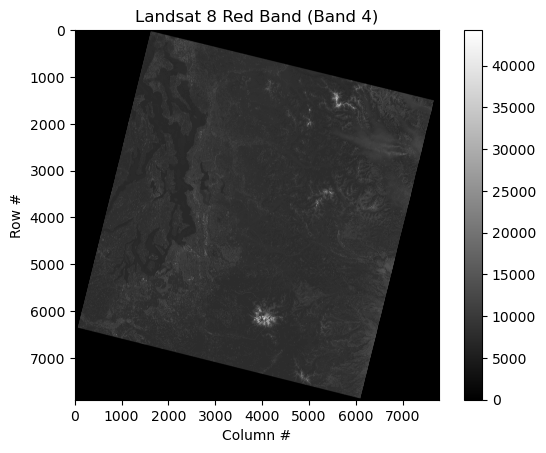

In [21]:
# Student exercise: your code goes here

with rio.open(r_fn) as src:
    r = src.read(1)
f, ax = plt.subplots()
im = ax.imshow(r, cmap='gray')
f.colorbar(im, ax=ax)
ax.set_title('Landsat 8 Red Band (Band 4)')
ax.set_xlabel('Column #')
ax.set_ylabel('Row #')
plt.show()

* Answer the following in the next cell: The Landsat-8 image appears "rotated" relative to the axes. Why is this?

The Landsat-8 image appears "rotated" relative to the axes because the data is georeferenced to the Earth's surface, meaning that the top of the image is aligned with the north direction on the ground, not necessarily the top of the image array. This orientation reflects the satellite's flight path and the angle at which the image was taken, rather than the rows and columns of the data array. In the context of the raster data, rows correspond to the y-coordinates (latitude) and columns correspond to the x-coordinates (longitude), which do not have to align with the image edges. The apparent rotation is a result of the projection and the specific area captured by the sensor, which includes the curvature and orientation of the Earth's surface. When the raster is plotted, the axes are labeled with row and column numbers, which are indices of the array and do not take into account the actual compass orientation of the data.

**Student exercise: your response goes here**

* Note the array coordinate system (where is the (0,0) origin)
* Interactively look at coordinates and the digital number (DN) values as you move your mouse over the image
    * The DN is the unsigned integer value, but not yet a calibrated surface reflectance value (which would have dimensionless values over the range 0.0-1.0)
    * Check DN values over Mt. Rainier, Puget Sound, and the outer "black" border

## Part 2: Histograms, NoData and Masked Arrays (2 pts)

### Create a histogram plot of raster values in your array
* Does the matplotlib `hist()` expect a 2D array or a 1D array?
    * Remember to use the NumPy `ravel()` function on your array when passing to `hist()`!
* Make sure you use enough bins!  Try at least ~200.

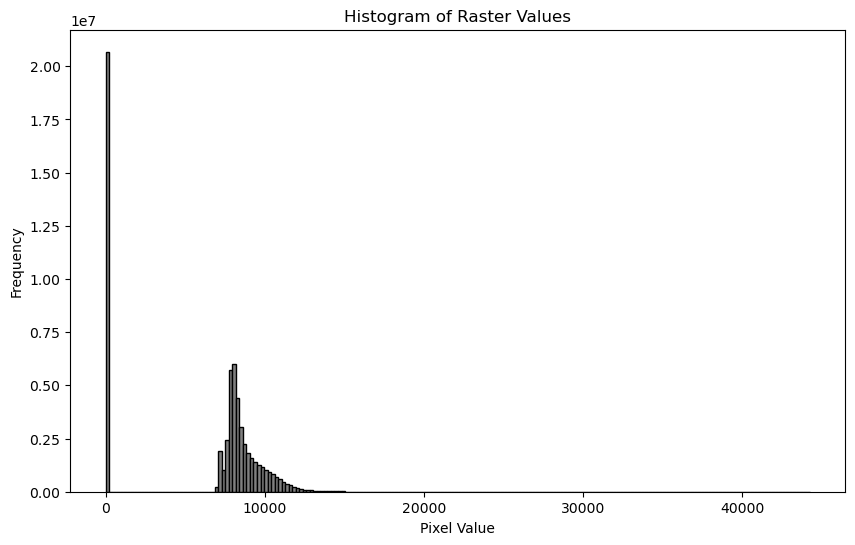

In [22]:
# Student exercise: your code goes here
with rio.open(r_fn) as src:
    # Read the first band
    r = src.read(1)

r_flat = r.ravel()

plt.figure(figsize=(10, 6))
plt.hist(r_flat, bins=200, color='gray', edgecolor='black')

plt.title('Histogram of Raster Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()

In [23]:
src.nodata

0.0

Answer the following in the next cell:
* Which bin has the highest count of pixels?
* Over what range do most of the raster values fall?
* Is this consistent with the original 12-bit sensor bit depth (2^12 possible values) and 16-bit integer data type (2^16 possible values)?

**Student exercise: your response goes here**
The histogram predominantly peaks at the left side, indicating a large number of pixels with low reflectance values, which are likely representing darker features or shadows in the image. The bin with the highest count of pixels is the first one, which includes the value zero, corresponding to the 'no data' areas or possibly water bodies that reflect very little in the red band. Most raster values fall within the lower end of the range, well below the midpoint of the possible 16-bit range (0-65535), as evidenced by the histogram's left skew. This distribution is consistent with the original 12-bit sensor bit depth of Landsat-8, which records values between 0 and 4095 and then scales them to the 16-bit range during processing; hence, the histogram does not extend beyond the value corresponding to 4095. The 16-bit representation in memory allows for a larger range of values, but the actual data remains within the 12-bit limit, resulting in a concentration of values at the lower end of the 16-bit scale.

### Let's get rid of that black border (nodata values)
* The Level-2 Landsat-8 images have a `nodata` value set in the image metadata, but we did not use this when reading. As a result, the 0 values around the margins are considered "valid" pixels, and these appear black in our grayscale color ramp.
* We have a few options to deal with missing data (read through both before starting):
    1. Set values of 0 to `np.nan`
        * Remember that `np.nan` is a special `float` object, so for this approach, you must first convert the entire array using `astype(float)`
            * This means we unnecessarily increase the amount of RAM required to store the same `UInt16` (2 byte) image DN values by a factor of 2x or 4x, as each `float32` value occupies 4 bytes, and the default NumPy `float` is actually `float64` or 8 bytes!  This increased memory requirement can be a real issue for large arrays. 
            * For this reason, I suggest that you work with masked arrays (Option 2) for rasters with integer data types and nodata defined.
        * Note that some packages like Pandas and xarray don't currently support masked ararys, but rely on `np.nan` for missing values
    2. Use a NumPy masked array (should be simple one-liner)
        * Take a few minutes to read about [masked arrays](https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html#what-is-a-masked-array)
            * Masked arrays allow for masking invalid values on any datatype (like `Byte` or `UInt16`)
                * Stores the mask as an additoinal 1-bit boolean array
        * See the `masked_equal` function to create a masked array from an existing array 
    3. Use the `masked=True` option when reading a band from the rasterio dataset (with NoData properly set)
        * For example `r = src.read(1, masked=True)`
        * More info on rasterio nodata handling and more advanced masking support: https://rasterio.readthedocs.io/en/latest/topics/masks.html

### Prepare a masked array for the red band using one of the approaches above
* Preview your new array 
* Inspect the mask
* Try plotting the masked array with imshow using the `gray` cmap
    * You should no longer see a black border around the valid pixels

In [24]:
# Student exercise: your code goes here
with rio.open(r_fn) as src:
    r = src.read(1)

    nodata_value = 0

r_masked = np.ma.masked_equal(r, nodata_value)

print("Masked array preview (subset):")
print(r_masked[:5, :5])


Masked array preview (subset):
[[-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]
 [-- -- -- -- --]]


In [25]:
# Student exercise: your code goes here
print("Mask preview (subset):")
print(r_masked.mask[:5, :5])


Mask preview (subset):
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


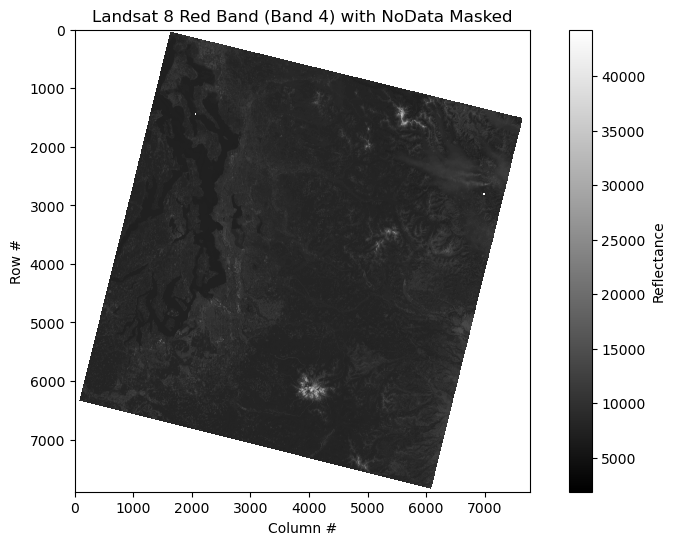

In [26]:
# Student exercise: your code goes here
plt.figure(figsize=(10, 6))
plt.imshow(r_masked, cmap='gray')
plt.colorbar(label='Reflectance')
plt.title('Landsat 8 Red Band (Band 4) with NoData Masked')
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

### Replot the histogram of your masked array
* Remember to use the new masked array object method `compressed()` to pass the unmasked values as a 1D array to `hist()`
* There should no longer be a spike for the 0 bin
* Try using `log=True` to the `hist` call to display logarithmic y axis for the bin counts

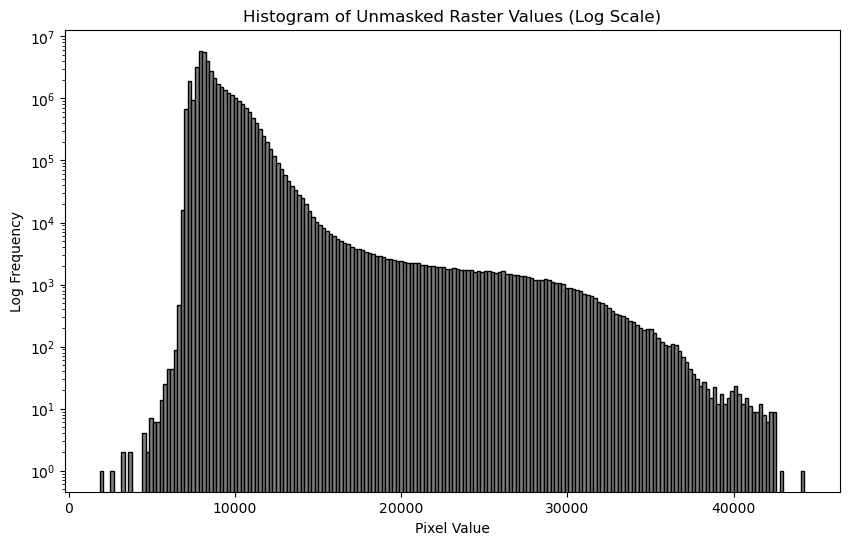

In [27]:
# Student exercise: your code goes here
r_compressed = r_masked.compressed()
plt.figure(figsize=(10, 6))
plt.hist(r_compressed, bins=200, color='gray', edgecolor='black', log=True)
plt.title('Histogram of Unmasked Raster Values (Log Scale)')
plt.xlabel('Pixel Value')
plt.ylabel('Log Frequency')
plt.show()

### Scale the 16-bit values to geophysical variables - surface reflectance
* We want to multiply the masked array values by the known scaling factor and then add the known offset value - these are provided by the Landsat project
    * See conversion factors here: https://www.usgs.gov/landsat-missions/landsat-collection-2-level-2-science-products
    * https://www.usgs.gov/faqs/how-do-i-use-scale-factor-landsat-level-2-science-products
* Store the output as a separate array 
*   Unitless surface reflectance values are from 0.0 to 1.0

In [28]:
#Surface Reflectance 0.0000275 + -0.2
sr_scale = 0.0000275
sr_offset = -0.2

In [29]:
# Student exercise: your code goes here
r_scaled = (r_masked * sr_scale) + sr_offset

r_scaled_masked = np.ma.masked_outside(r_scaled, 0.0, 1.0)


* Confidence check with a histogram

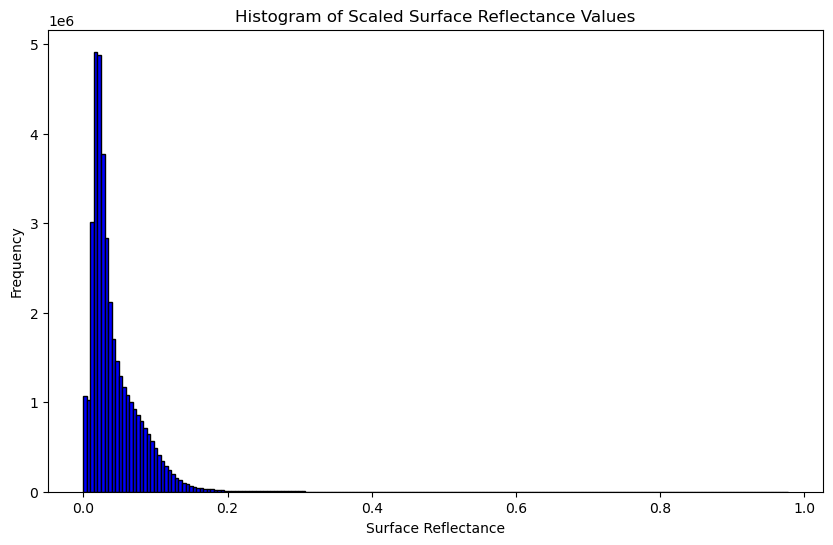

In [30]:
# Student exercise: your code goes here
r_scaled_compressed = r_scaled_masked.compressed()
plt.figure(figsize=(10, 6))
plt.hist(r_scaled_compressed, bins=200, color='blue', edgecolor='black')
plt.title('Histogram of Scaled Surface Reflectance Values')
plt.xlabel('Surface Reflectance')
plt.ylabel('Frequency')
plt.show()

### Print the min and max values of the original, masked, and scaled arrays
* Note that 0 is no longer the minimum in the scaled values for the masked array

In [31]:
# Student exercise: your code goes here
print(f"Original array min value: {r.min()}")
print(f"Original array max value: {r.max()}")
print(f"Masked array min value: {r_masked.min()}")
print(f"Masked array max value: {r_masked.max()}")
print(f"Scaled surface reflectance array min value: {r_scaled_masked.min()}")
print(f"Scaled surface reflectance array max value: {r_scaled_masked.max()}")



Original array min value: 0
Original array max value: 44254
Masked array min value: 1867
Masked array max value: 44254
Scaled surface reflectance array min value: 7.499999999993623e-06
Scaled surface reflectance array max value: 0.9770825000000001


### Determine 2nd and 98th percentile of surface reflectance values
* These percentile values can be used to automatically set the `vmin` and `vmax` when plotting (e.g., in QGIS)
* Note that if you're using a masked array, you will need to isolate unmasked values using the `compressed()` method before passing to regular NumPy functions like `np.percentile`
* Plot these as vertical dotted black lines on a histogram
    * Hopefully this helps visualize what these percentile values represent based on your distribution.

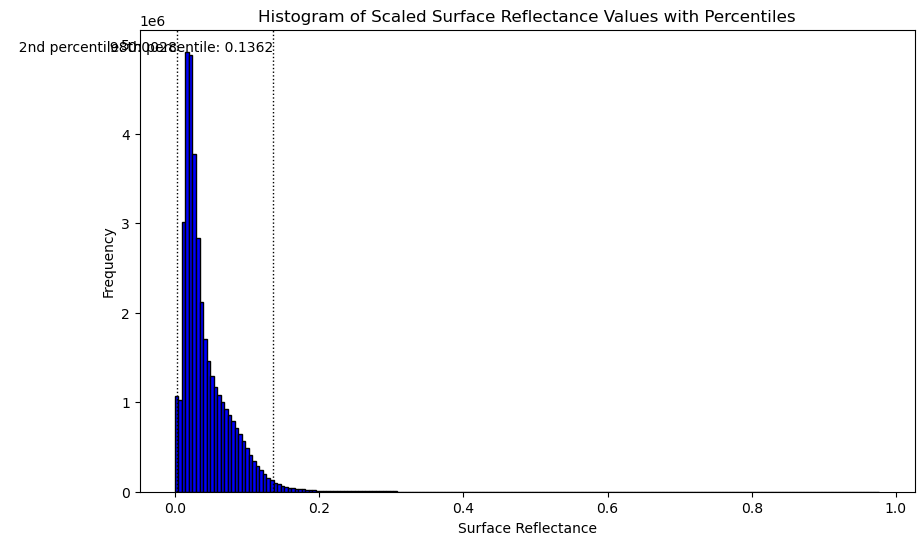

In [32]:
# Student exercise: your code goes here
# Compress the masked array to remove nodata values
r_scaled_compressed = r_scaled_masked.compressed()

# Calculate the 2nd and 98th percentiles of the scaled surface reflectance values
percentile_2nd = np.percentile(r_scaled_compressed, 2)
percentile_98th = np.percentile(r_scaled_compressed, 98)

# Create a histogram of the scaled surface reflectance values
plt.figure(figsize=(10, 6))
histogram = plt.hist(r_scaled_compressed, bins=200, color='blue', edgecolor='black')

# Plot vertical lines for the 2nd and 98th percentiles
plt.axvline(percentile_2nd, color='black', linestyle='dotted', linewidth=1)
plt.axvline(percentile_98th, color='black', linestyle='dotted', linewidth=1)

# Annotate the percentile lines
plt.text(percentile_2nd, max(histogram[0]), f'  2nd percentile: {percentile_2nd:.4f}', ha='right', color='black')
plt.text(percentile_98th, max(histogram[0]), f'  98th percentile: {percentile_98th:.4f}', ha='right', color='black')

# Set the title and labels
plt.title('Histogram of Scaled Surface Reflectance Values with Percentiles')
plt.xlabel('Surface Reflectance')
plt.ylabel('Frequency')

# Show the plot with percentile lines
plt.show()


## Part 3: Raster transform (2 pts)
* Inspect the dataset `transform` attribute
* Review this: https://rasterio.readthedocs.io/en/stable/topics/georeferencing.html?highlight=affine#coordinate-transformation

In [33]:
# Student exercise: your code goes here
# Open the raster dataset
with rasterio.open(r_fn) as src:
    transform = src.transform
    print("Raster dataset transform:\n", transform)

    x, y = transform * (0, 0)
    print(f"Spatial coordinates of the upper left pixel: x={x}, y={y}")

    x, y = transform * (src.width, src.height)
    print(f"Spatial coordinates of the lower right pixel: x={x}, y={y}")

Raster dataset transform:
 | 30.00, 0.00, 473685.00|
| 0.00,-30.00, 5373615.00|
| 0.00, 0.00, 1.00|
Spatial coordinates of the upper left pixel: x=473685.0, y=5373615.0
Spatial coordinates of the lower right pixel: x=706815.0, y=5136885.0


Answer the following in the next cell: In your own words, what does this thing do?

**Student exercise: your response goes here**

The transform attribute of a raster dataset defines how pixel coordinates are mapped to spatial coordinates. In this case, the Affine transform tells us that each pixel moves 30 units in the x-direction (east-west) and -30 units in the y-direction (north-south) from the origin. The origin of the raster, or the upper left corner, is at the spatial coordinates (x=473685.0, y=5373615.0). When we apply this transform to the width and height of the raster, we obtain the spatial coordinates of the lower right pixel, which are (x=706815.0, y=5136885.0). This transformation is crucial for georeferencing the image, as it allows us to locate each pixel precisely on the Earth's surface according to the dataset's coordinate reference system.

### Calculate corner coordinates
* Use the affine transform to calculate the projected coordinates of the array corners
* Creating tuples of array corner pixel coordinates (e.g. `[(0,0), (array.shape[1], 0), ...]`
    * Useful to think of corners as upper left, upper right, lower right, lower left
    * *Careful about mixing (rows, columns) and (x, y) coordinates!*
    * I recommend you draw a quick sketch for this exercise

In [34]:
# Student exercise: your code goes here
# Open the raster dataset to access its width, height, and transform
with rasterio.open(r_fn) as src:

    width, height = src.width, src.height
    
    transform = src.transform
    
upper_left_pixel = (0, 0)
upper_right_pixel = (width, 0)
lower_right_pixel = (width, height)
lower_left_pixel = (0, height)

upper_left = transform * upper_left_pixel
upper_right = transform * upper_right_pixel
lower_right = transform * lower_right_pixel
lower_left = transform * lower_left_pixel

print("Upper Left Corner:", upper_left)
print("Upper Right Corner:", upper_right)
print("Lower Right Corner:", lower_right)
print("Lower Left Corner:", lower_left)

Upper Left Corner: (473685.0, 5373615.0)
Upper Right Corner: (706815.0, 5373615.0)
Lower Right Corner: (706815.0, 5136885.0)
Lower Left Corner: (473685.0, 5136885.0)


In [35]:
# Student exercise: your code goes here

pixel_coords = np.array([[0, 0], [0, 7891], [7771, 0], [7771, 7891]])

projected_coords = np.array([[473685., 5373615.], [473685., 5136885.], [706815., 5373615.], [706815., 5136885.]])

with rasterio.open(r_fn) as src:
    transform = src.transform
    projected_coords_calculated = np.array([transform * (x, y) for x, y in pixel_coords])


* Compare your calculated points to the rasterio dataset `bounds` attribute

### Compute total dimensions of the projected raster dataset in km
* Use the coordinates for your corners
* Confidence check! Look up the actual LS-8 image footprint dimensions in km - make sure your calculated values are somewhat consistent. They may be different due to projection!

In [36]:
# Student exercise: your code goes here

upper_left = np.array([473685., 5373615.])
lower_left = np.array([473685., 5136885.])
upper_right = np.array([706815., 5373615.])

width_m = np.linalg.norm(upper_right - upper_left)
height_m = np.linalg.norm(upper_left - lower_left)

width_km = width_m / 1000.0
height_km = height_m / 1000.0

print(f"Width of the raster dataset: {width_km:.2f} km")
print(f"Height of the raster dataset: {height_km:.2f} km")


Width of the raster dataset: 233.13 km
Height of the raster dataset: 236.73 km


### Determine the array indices (row, column) of the center pixel in the image
* Try to use array attributes (like `shape`) here, instead of hardcoding values
* Note that we have an odd number of rows and columns in this array, so may need to round to nearest integer values

In [37]:
# Student exercise: your code goes here
rows, cols = r.shape
center_row = rows // 2
center_col = cols // 2
print(f"Center pixel row index: {center_row}")
print(f"Center pixel column index: {center_col}")


Center pixel row index: 3945
Center pixel column index: 3885


### Determine the surface reflectance value at this center pixel using array indexing
* Don't overthink this, just extract a value from the numpy array for the (row, col) indices you determined
    * You've done this kind of thing before, (e.g., `myarray[0,0]`)
* Make sure you are using integer values here (may need to convert/round), or NumPy will return an `IndexError`

## Student exercise: your code goes here
center_value = r_scaled[center_row, center_col]

print(f"Surface reflectance value at center pixel: {center_value}")

* Do a confidence check on an interactive `imshow` plot to check values near the center of the image

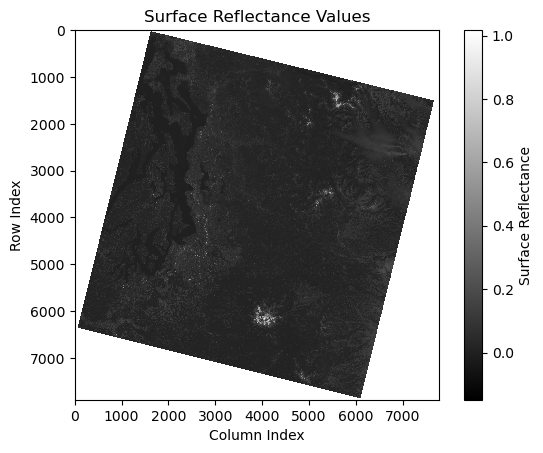

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(r_scaled, cmap='gray', interpolation='nearest')

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Surface Reflectance')

ax.set_title('Surface Reflectance Values')
ax.set_xlabel('Column Index')
ax.set_ylabel('Row Index')

plt.show()


### Determine the projected coordinates (meters in UTM 10N) of the center pixel
* Review the rasterio dataset `xy` method: https://rasterio.readthedocs.io/en/latest/api/rasterio.transform.html#rasterio.transform.TransformMethodsMixin.xy
    * Careful about the order of your row and column indices
* Confidence check the resulting projected coordinates with rasterio dataset `index` method - this should return your (row, col) indices
    * https://rasterio.readthedocs.io/en/latest/api/rasterio.transform.html#rasterio.transform.TransformMethodsMixin.index
    * These may be rounded to nearest integer
* These two functions allow you to go back and forth between the array coordiantes and the projected coordinate system!

In [39]:
# Student exercise: your code goes here
import rasterio

# Open the raster dataset
with rasterio.open(r_fn) as src:
    center_row = src.height // 2
    center_col = src.width // 2

    center_x, center_y = src.xy(center_row, center_col)
    print(f"Projected coordinates of the center pixel: X={center_x}, Y={center_y}")
    

    row_index, col_index = src.index(center_x, center_y)
    print(f"Array indices from projected coordinates: Row={row_index}, Column={col_index}")
    
    

Projected coordinates of the center pixel: X=590250.0, Y=5255250.0
Array indices from projected coordinates: Row=3945, Column=3885


### Sample the rasterio dataset (extract the raster value) using these projected coordinates
* This doesn't require reading the array, but can be run on the src dataset for a list of (x,y) coordiantes
* See https://rasterio.readthedocs.io/en/latest/api/rasterio.sample.html
* Note that this will return an iterable generator, so will need to evaluate (can encompass in `list()` operator)
* The resulting DN value should be similar to the value you extracted directly from the array

In [40]:
# Student exercise: your code goes here
coordinates = [(590250.0, 5255250.0)]

with rasterio.open(r_fn) as src:
    samples = src.sample(coordinates)
    
    values = list(samples)
    
    print(f"Sampled raster values at the given coordinates: {values}")

Sampled raster values at the given coordinates: [array([7914], dtype=uint16)]


### Now, apply what you've learned!
What is the raster value at the following projected coordinates:
* (522785.0, 5323315.0)
* (`src.bounds.left + 50000`, `src.bounds.top - 50000`)

In [41]:
# Student exercise: your code goes here
with rasterio.open(r_fn) as src:
    coord1 = (522785.0, 5323315.0)

    coord2 = (src.bounds.left + 50000, src.bounds.top - 50000)
    
    samples = src.sample([coord1, coord2])
    
    values = list(samples)
    
    print(f"Raster value at (522785.0, 5323315.0): {values[0]}")
    print(f"Raster value at (src.bounds.left + 50000, src.bounds.top - 50000): {values[1]}")


Raster value at (522785.0, 5323315.0): [7910]
Raster value at (src.bounds.left + 50000, src.bounds.top - 50000): [7173]


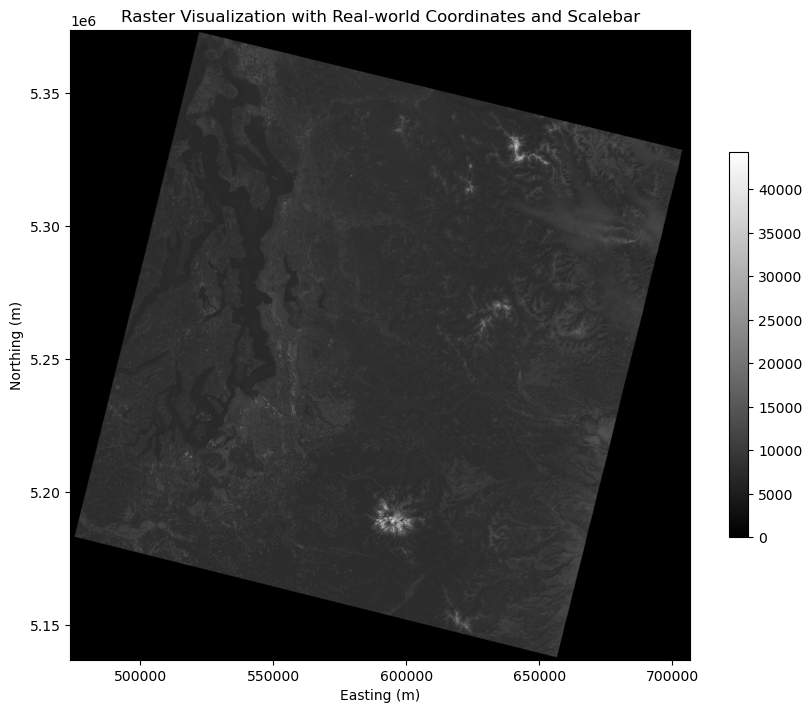

In [42]:
# Student exercise: your code goes here
with rasterio.open(r_fn) as src:
    full_extent = rasterio.plot.plotting_extent(src)
    band1 = src.read(1)
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.imshow(band1, cmap='gray', extent=full_extent)
    ax.set_title('Raster Visualization with Real-world Coordinates and Scalebar')
    ax.set_xlabel('Easting (m)')
    ax.set_ylabel('Northing (m)')
    plt.colorbar(cax, ax=ax, shrink=0.5)
    plt.show()

## Part 4: Raster visualization with real-world coordinates and scalebar (1 pt)

### Extract the full-image `extent` in projected coordinates to pass to matplotlib `imshow`
* Start with the rasterio dataset bounds
* See doc on imshow `extent` parameter here: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html
* Note that the matplotlib `extent` is similar to the rasterio `bounds`, but not identical!
    * Be careful about ordering of bounds (left, bottom, right, top) vs. extent (min_x, max_x, min_y, max_y)!
        * Good to practice, as this comes up often when working with rasters using different tools
* Alternatively, there is the helpful `rio.plot.plotting_extent()` convenience function to get the matplotlib `extent` for a rasterio Dataset: https://rasterio.readthedocs.io/en/latest/api/rasterio.plot.html#rasterio.plot.plotting_extent

In [43]:
#This is rasterio bounds
src.bounds

BoundingBox(left=473685.0, bottom=5136885.0, right=706815.0, top=5373615.0)

In [44]:
#This is matplotlib extent
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
print(full_extent)

[473685.0, 706815.0, 5136885.0, 5373615.0]


In [45]:
#rasterio convenience function
full_extent = rio.plot.plotting_extent(src)
print(full_extent)

(473685.0, 706815.0, 5136885.0, 5373615.0)


### Plot the image in array coordinates and projected coordinates
For projected coordinates, make sure to pass the extent you defined above to `extent` as an argument
* Note how the axes coordinates change
    * These should now be meters in the UTM 10N coordinate system of the projected image!

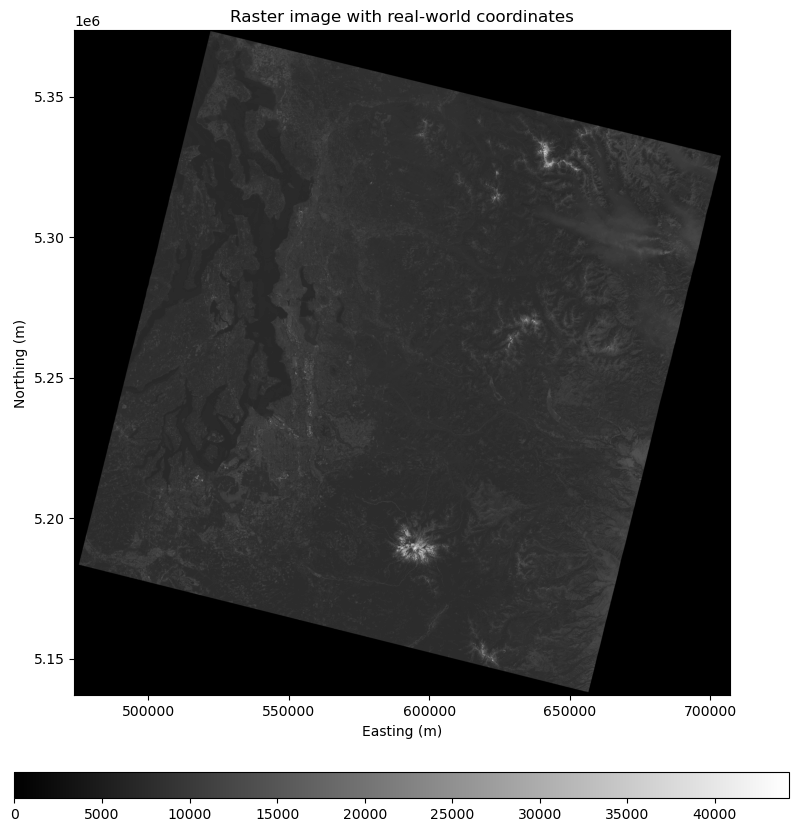

In [46]:
# Student exercise: your code goes here
with rasterio.open(r_fn) as src:
    data = src.read(1)
    
    extent = rasterio.plot.plotting_extent(src)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    img = ax.imshow(data, extent=extent, cmap='gray')
    ax.set_title('Raster image with real-world coordinates')
    ax.set_xlabel('Easting (m)')
    ax.set_ylabel('Northing (m)')
    
    plt.colorbar(img, ax=ax, orientation='horizontal', fraction=0.036, pad=0.1, aspect=30)
    plt.show()

### Add a dynamic scalebar to the above plot
* We will use the `matplotlib-scalebar` package for this
* See documentation: https://github.com/ppinard/matplotlib-scalebar
> The constructor arguments dx and units specify the pixel dimension. For example scalebar = ScaleBar(0.2, 'um') indicates that each pixel is equal to 0.2 micrometer. If the the axes image has already been calibrated by setting its extent, set dx to 1.0.
    * In other words:
        * For imshow using array coordinates (without defining `extent`), use `ax.add_artist(ScaleBar(res))` where `res` is the pixel resolution in meters
        * For imshow using projected coordinates with `extent` defined, use `ax.add_artist(ScaleBar(1.0))` because one unit in the axes coordinate system is equal to 1 m
* Note that you can control the location of the scalebar with the `location` keyword argument, passed to the `ScaleBar()` constructor: https://github.com/ppinard/matplotlib-scalebar#location
* If using interactive matplotlib backend, note what happens to the scalebar when you zoom

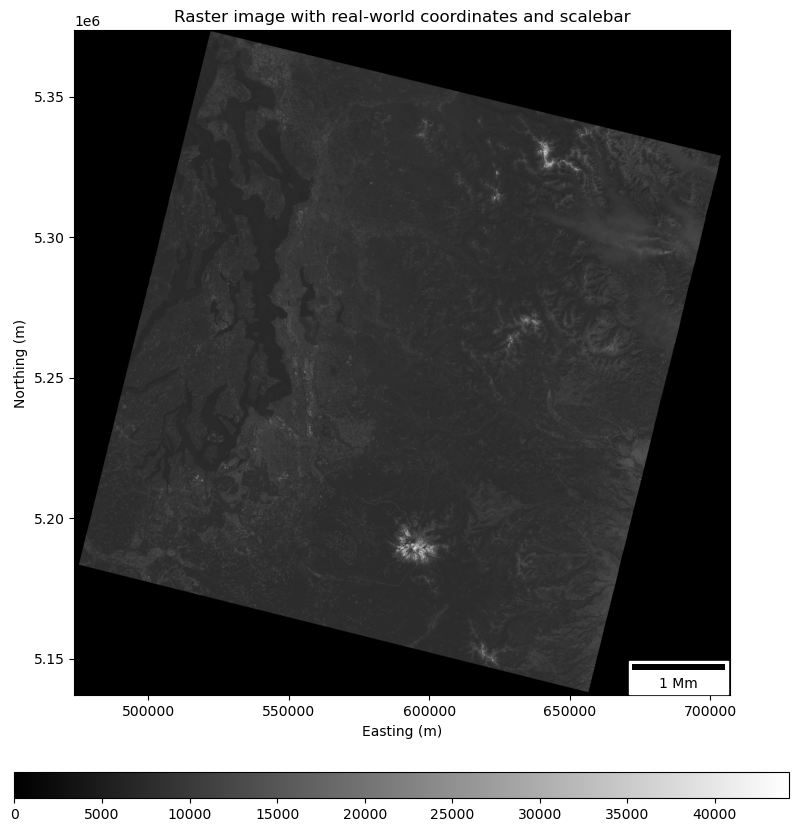

In [47]:
# Student exercise: your code goes here
with rasterio.open(r_fn) as src:
    # Read the data from the first band
    data = src.read(1)
    extent = rasterio.plot.plotting_extent(src)

    dx = (src.bounds.right - src.bounds.left) / src.width
    
    fig, ax = plt.subplots(figsize=(10, 10))
    img = ax.imshow(data, extent=extent, cmap='gray')
    ax.set_title('Raster image with real-world coordinates and scalebar')
    ax.set_xlabel('Easting (m)')
    ax.set_ylabel('Northing (m)')
    plt.colorbar(img, ax=ax, orientation='horizontal', fraction=0.036, pad=0.1, aspect=30)
    

    scalebar = ScaleBar(dx, 'm', location='lower right')
    ax.add_artist(scalebar)
    
    plt.show()

## Part 5A: Raster window extraction (1 pt)

* We could continue our analysis with the full images, but for many science and engineering applications, we only care about a small subset of a raster at any given time
* It's also a good practice to prototype new workflows using a small subset of data
    * Less memory usage, much faster processing, faster debugging
    * Remember this for your project!  **Don't start with full-resolution raster data.**
* One way to accomplish this might be to extract a portion of the large array using slicing/striding (see the Lab03 NumPy section)
    * Maybe a good time to review https://numpy.org/doc/stable/user/basics.indexing.html#slicing-and-striding
* To extract a 1024x1024 px chunk of the full-size array, we could do something like:

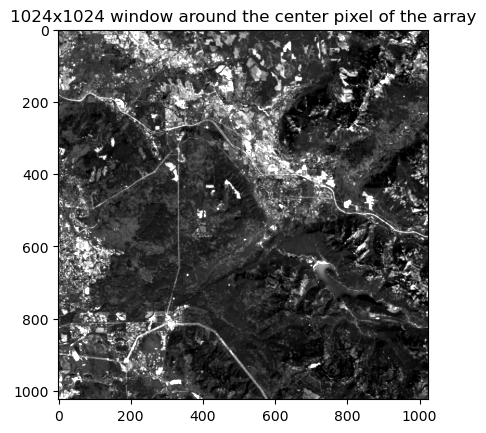

In [48]:

with rasterio.open(r_fn) as src:
    full_dataset = src.read(1)

    window_size = 1024  # 256x256 pixel window
    rows, cols = full_dataset.shape

    center_row, center_col = rows // 2, cols // 2

    start_row = center_row - window_size // 2
    end_row = center_row + window_size // 2
    start_col = center_col - window_size // 2
    end_col = center_col + window_size // 2
    center_chunk = full_dataset[start_row:end_row, start_col:end_col]


    vmin, vmax = np.percentile(center_chunk, 2), np.percentile(center_chunk, 98)

    fig, ax = plt.subplots()
    ax.imshow(center_chunk, cmap='gray', vmin=vmin, vmax=vmax)
    ax.set_title('1024x1024 window around the center pixel of the array')
    plt.show()

### Extract a 256x256 pixel window around the center pixel of the array
* You already determined the center pixel indices earlier
* You'll need to define the appropriate slices for both rows and columns
    * Use variables to define window dimensions, rather than hardcoding 256 or 128
* Preview the resulting 256x256 pixel array with imshow

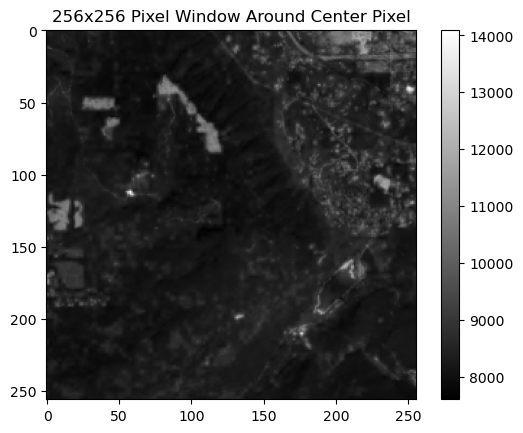

In [49]:
# Student exercise: your code goes here
window_size = 256
half_window = window_size // 2

center_row, center_col = r.shape[0] // 2, r.shape[1] // 2

row_start = max(0, center_row - half_window)
row_end = min(r.shape[0], center_row + half_window)
col_start = max(0, center_col - half_window)
col_end = min(r.shape[1], center_col + half_window)

window = r[row_start:row_end, col_start:col_end]

fig, ax = plt.subplots()
im = ax.imshow(window, cmap='gray')
ax.set_title('256x256 Pixel Window Around Center Pixel')
plt.colorbar(im, ax=ax)
plt.show()

## Move on to Notebook #2, but first... 
* Save this notebook, then `git add` and `git commit`
* **Shut down the kernel to free RAM**
* Proceed to Notebook #2!
    * We will explore the with rasterio `window` functionality to extract windows directly from the original tif files, then do all kinds of cool raster analysis with the resulting arrays